In [42]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [43]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [44]:
NUM_CLASSES = 5

# 学習データ読み込み

In [45]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [46]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [48]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [49]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_6 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [51]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [52]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 17s 586ms/step - accuracy: 0.1953 - loss: 1.7534
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2491 - loss: 1.6502 - val_accuracy: 0.3782 - val_loss: 1.4227
Epoch 2/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2969 - loss: 1.4550
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3333 - loss: 1.4536 - val_accuracy: 0.4210 - val_loss: 1.3240
Epoch 3/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4062 - loss: 1.3625
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3877 - loss: 1.3583 - val_accuracy: 0.5051 - val_loss: 1.2343
Epoch 4/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3984 - loss: 1.2889
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [53]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.9641 - loss: 0.2219


In [54]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [55]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[9.9382138e-01 6.1785909e-03 1.3679340e-09 3.7510672e-10 6.9216560e-12]
0


# 混同行列

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


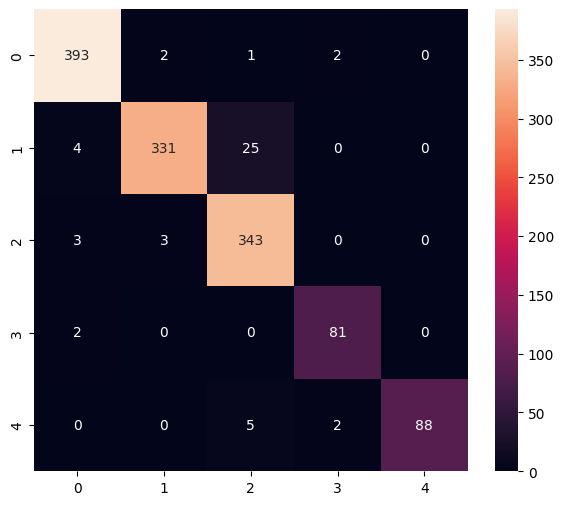

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       398
           1       0.99      0.92      0.95       360
           2       0.92      0.98      0.95       349
           3       0.95      0.98      0.96        83
           4       1.00      0.93      0.96        95

    accuracy                           0.96      1285
   macro avg       0.97      0.96      0.96      1285
weighted avg       0.96      0.96      0.96      1285



In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [57]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [58]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmptc3_m0q2\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmptc3_m0q2\assets


Saved artifact at 'C:\Users\User\AppData\Local\Temp\tmptc3_m0q2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  1628509969616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1628509970768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1628509970192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1628509968848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1628509969232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1628509966352: TensorSpec(shape=(), dtype=tf.resource, name=None)


6652

# 推論テスト

In [59]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [60]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [61]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [62]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [63]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.9382138e-01 6.1786058e-03 1.3679339e-09 3.7510742e-10 6.9216681e-12]
0
